In [1]:
import os

import pandas as pd
import polars as pl

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

import egoviz.models.evaluation as ev
import egoviz.models.processing as pr
import egoviz.visualize as viz

SEED = 42

pd.set_option("display.max_rows", 300)
cwd = os.getcwd()

2024-12-17 16:06:00,997 - matplotlib.font_manager - INFO - Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Can not load face (unknown file format; error code 0x2)
2024-12-17 16:06:01,221 - matplotlib.font_manager - INFO - generated new fontManager


In [2]:
raw_binary = pr.load_pickle(os.path.join(cwd, '../data/home_data_all_preds_df.pkl'))
df_binary_active = pr.generate_binary_presence_df(raw_binary)
df_binary_active_pl = pl.from_pandas(df_binary_active)

In [3]:
df_binary_active = pr.row_wise_min_max_scaling(df_binary_active)

In [4]:
def get_models():
    return [
        ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=SEED, class_weight='balanced')),
    ]

In [5]:
label_encoder = LabelEncoder()

In [6]:
results_binary_active, results_binary_active_df = ev.evaluate_models(get_models(), df_binary_active, label_encoder)
binary_active_table = ev.display_pct_table(results_binary_active_df)
binary_active_table["AUC"] = [round(result.auc, 2) for result in results_binary_active]

binary_active_table

2024-12-17 16:06:07,214 - root - INFO - LOGOCV complete for LogisticRegression


,model,median_f1,mean_f1,std_f1,pct_above_0.5,AUC
0,LogisticRegression,0.811589,0.784882,0.119884,1.0,0.94


In [11]:
cm = results_binary_active[0].cm

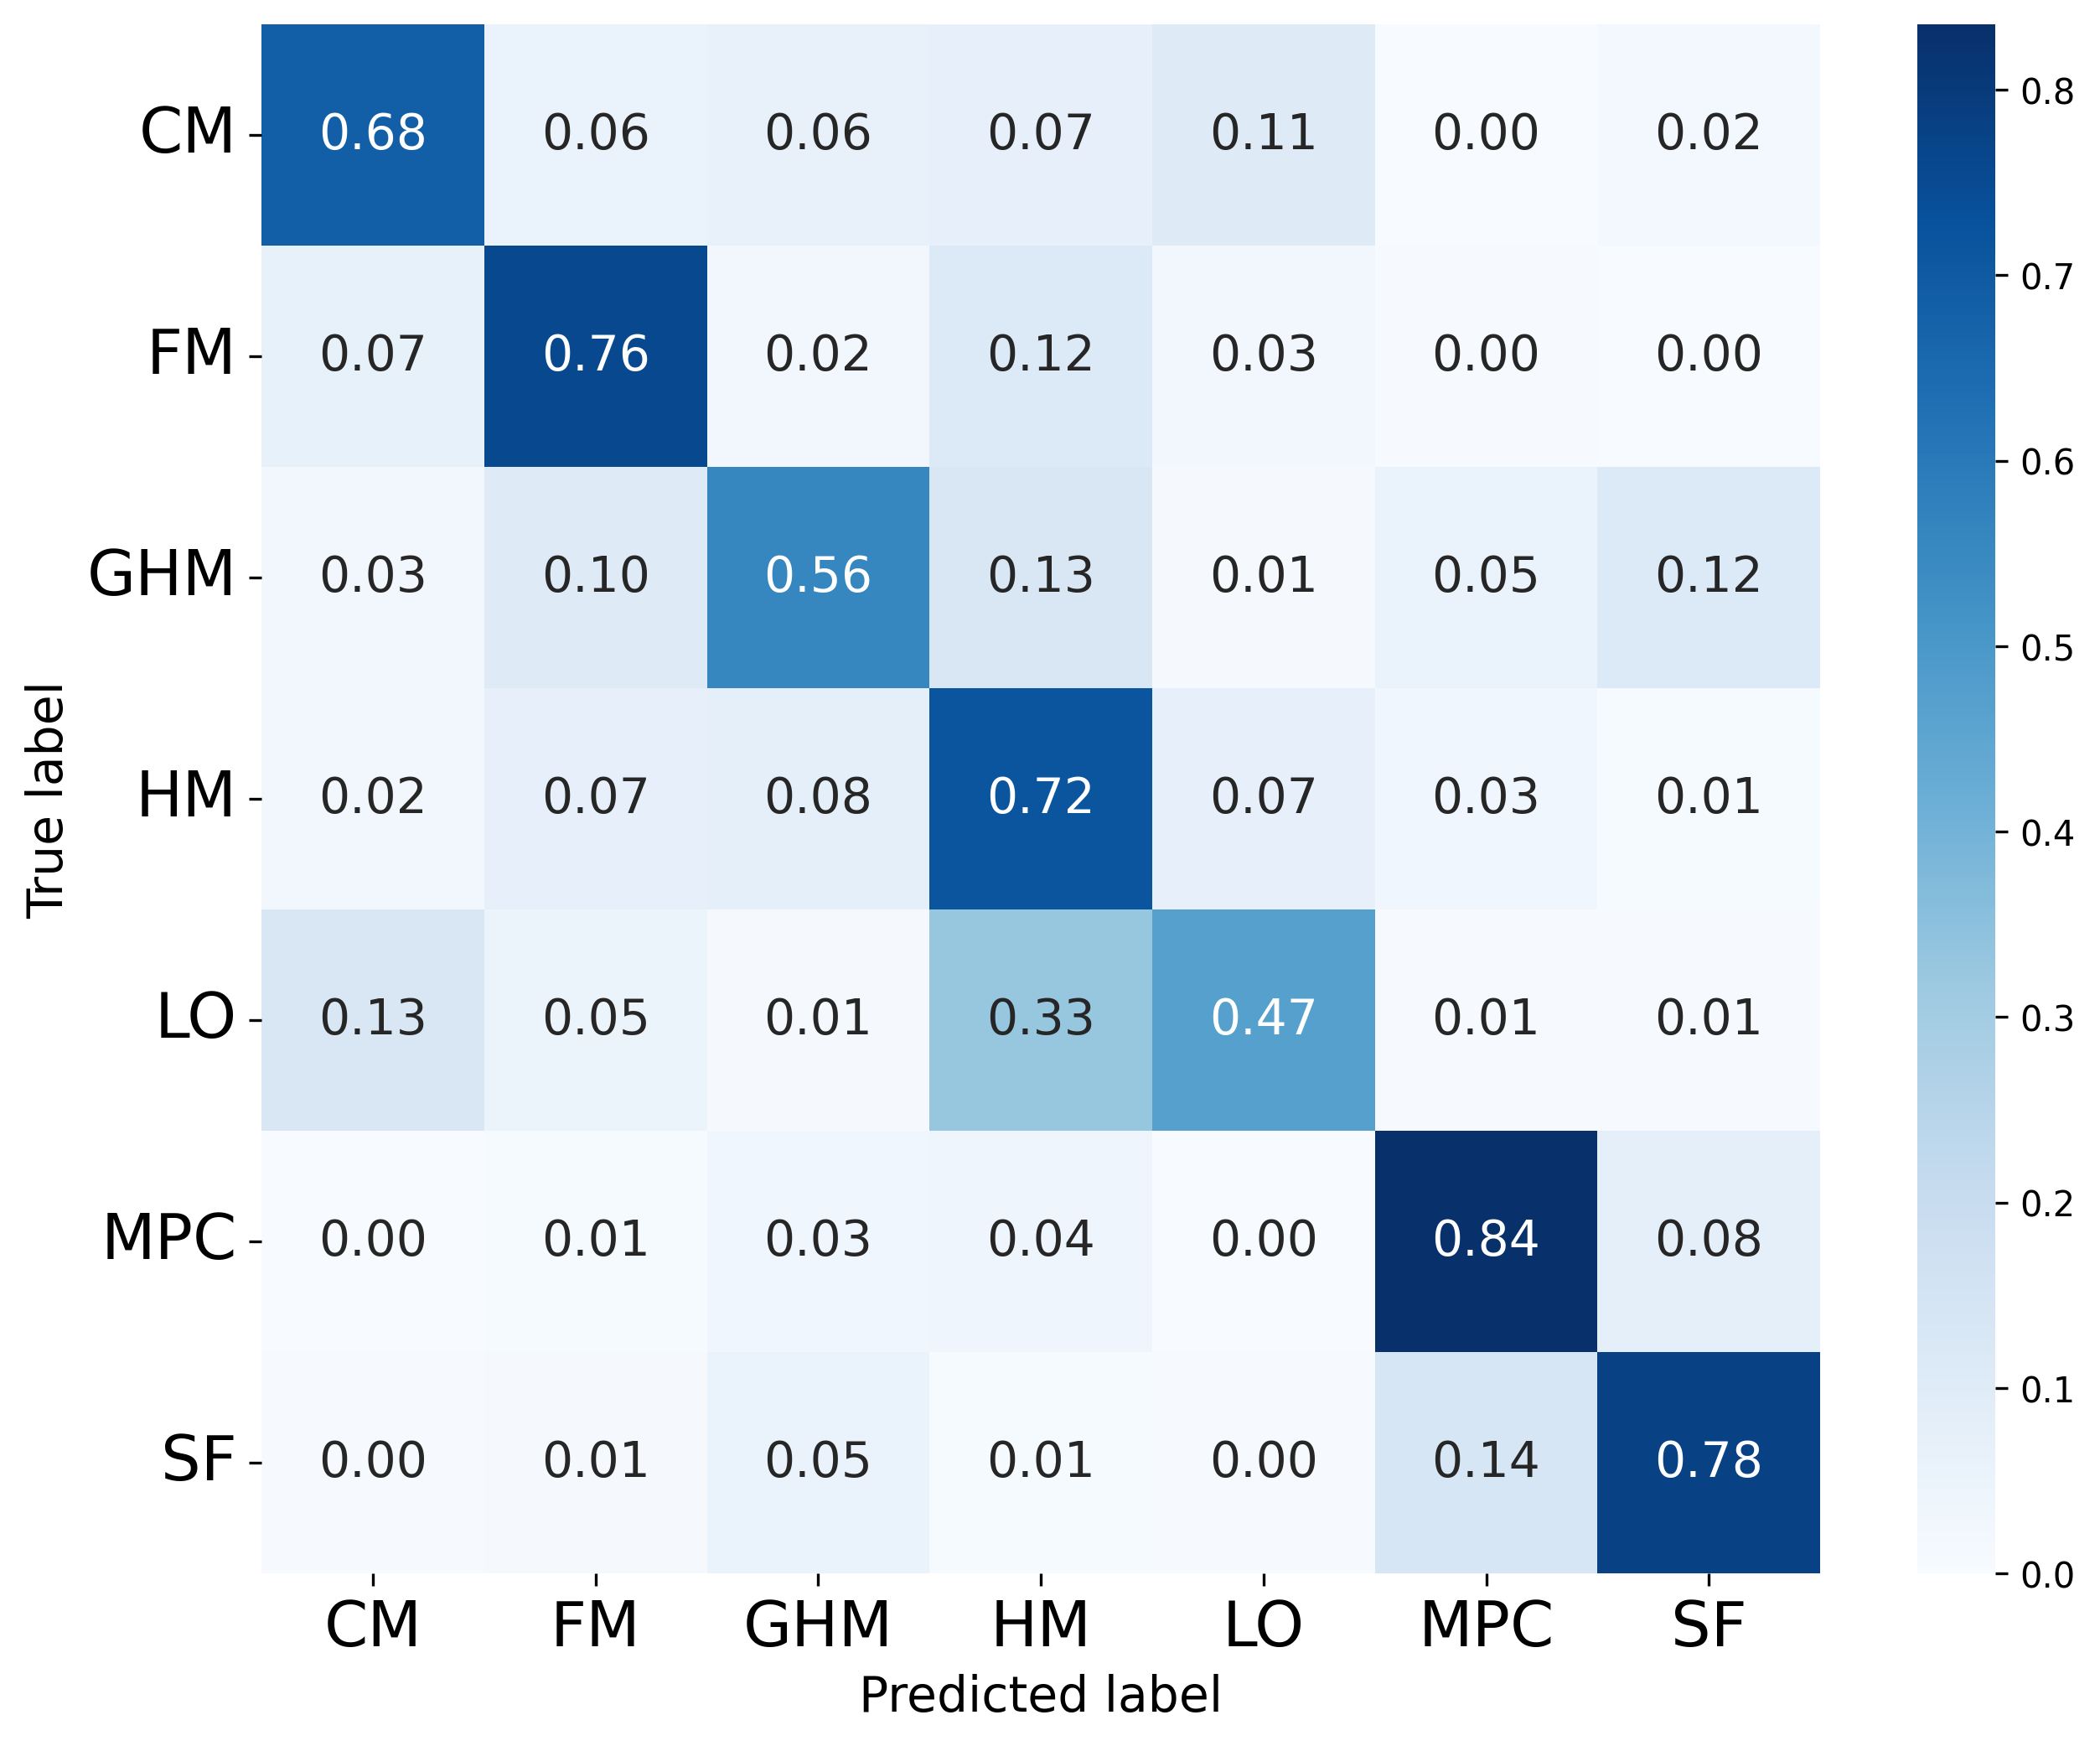

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

figsize = (10, 8)
dpi = 300
title = ""
clf = get_models()[0][1]

cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
fmt = ".2f"

df_cm = pd.DataFrame(
    cm,
    index=(
        ['CM', 'FM', 'GHM', 'HM', 'LO', 'MPC', 'SF']
    ),
    columns=(
        ['CM', 'FM', 'GHM', 'HM', 'LO', 'MPC', 'SF']
    ),
)
fig = plt.figure(figsize=figsize, dpi=dpi)
sns.heatmap(df_cm, annot=True, fmt=fmt, cmap="Blues", annot_kws={"size": 14})
plt.ylabel("True label", fontsize=14)
plt.xlabel("Predicted label", fontsize=14)

# Increase tick label font sizes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, rotation=0)
plt.show()

In [7]:
from egoviz.models import inference

inference.train_final_model(df_binary_active_pl, '../models/binary_active_logreg.joblib')

2024-11-25 03:23:45,426 - root - INFO - Saved production model to ../models/binary_active_logreg.joblib


ProductionModel(model=LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42), label_encoder=LabelEncoder(), feature_names=['count_clothing_accessory', 'count_phone_tablet', 'count_other', 'count_office_stationary', 'count_footwear', 'count_furniture', 'active_other', 'active_furniture', 'active_office_stationary', 'active_footwear', 'active_phone_tablet', 'active_clothing_accessory', 'count_furnishing', 'active_furnishing', 'count_drinkware', 'active_drinkware', 'count_home_appliance_tool', 'active_home_appliance_tool', 'count_food', 'active_food', 'count_animal', 'active_animal', 'count_clothing', 'active_clothing', 'count_cleaning_product', 'active_cleaning_product', 'count_bag', 'active_bag', 'count_toiletries', 'active_toiletries', 'count_electronics', 'active_electronics', 'count_kitchen_utensils', 'active_kitchen_utensils', 'count_wheelchair_walker', 'active_wheelchair_walker', 'count_sports_equipment', 'active_sports_equipment', 'count_musical_instrument', '